## Imports and Data

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sb
#import scanpy as sc
#import umap as up
import scipy.stats
import os

## Plot Results

In [108]:
results = pd.read_csv("Results.csv")

In [109]:
results= results[results.columns[:-1]].copy()

In [111]:

results.Parameters = results.Parameters.astype("category")


In [112]:
#rename some entries
results.Parameters = results.Parameters.astype(str)
results.loc[results.Parameters =="LDO","Parameters"]="Unseen Drug"
results.loc[results.Parameters =="LCO","Parameters"]="Unseen Cell line"
results.Parameters = results.Parameters.astype("category")

In [113]:
#bring to correct format for seaborn
r = results.melt(id_vars=["Model","Parameters"],var_name="Fold", 
        value_name="PCC")

In [114]:
r.Parameters =  r.Parameters.astype("str")
r.Parameters =  r.Parameters.astype("category")

In [115]:
#set figure size and palette
sb.set(rc={'figure.figsize':(20,10)})
sb.set_palette("pastel")

In [118]:
#make an array of results for the line plot
def get_combined(r,parameter):
    onco_line= []
    r[""]=np.nan
    for i in range(-1,len(r.Model.unique())+2):
        r.loc[(r.Model=="Oncogenes")&(r.Parameters == parameter),""]=i
        onco_line.append(r[(r.Model=="Oncogenes")&(r.Parameters == parameter)])
    combines = pd.concat(onco_line)
    return combines

In [119]:
palette = {"Default":sb.color_palette("tab10")[4],
            "Randomized GE":sb.color_palette("pastel")[0],
           "Randomized Drug":sb.color_palette("tab10")[6],
          "Unseen Drug":sb.color_palette("pastel")[6],
          "Unseen Cell line":sb.color_palette("pastel")[9]}

(-0.5, 11.5)

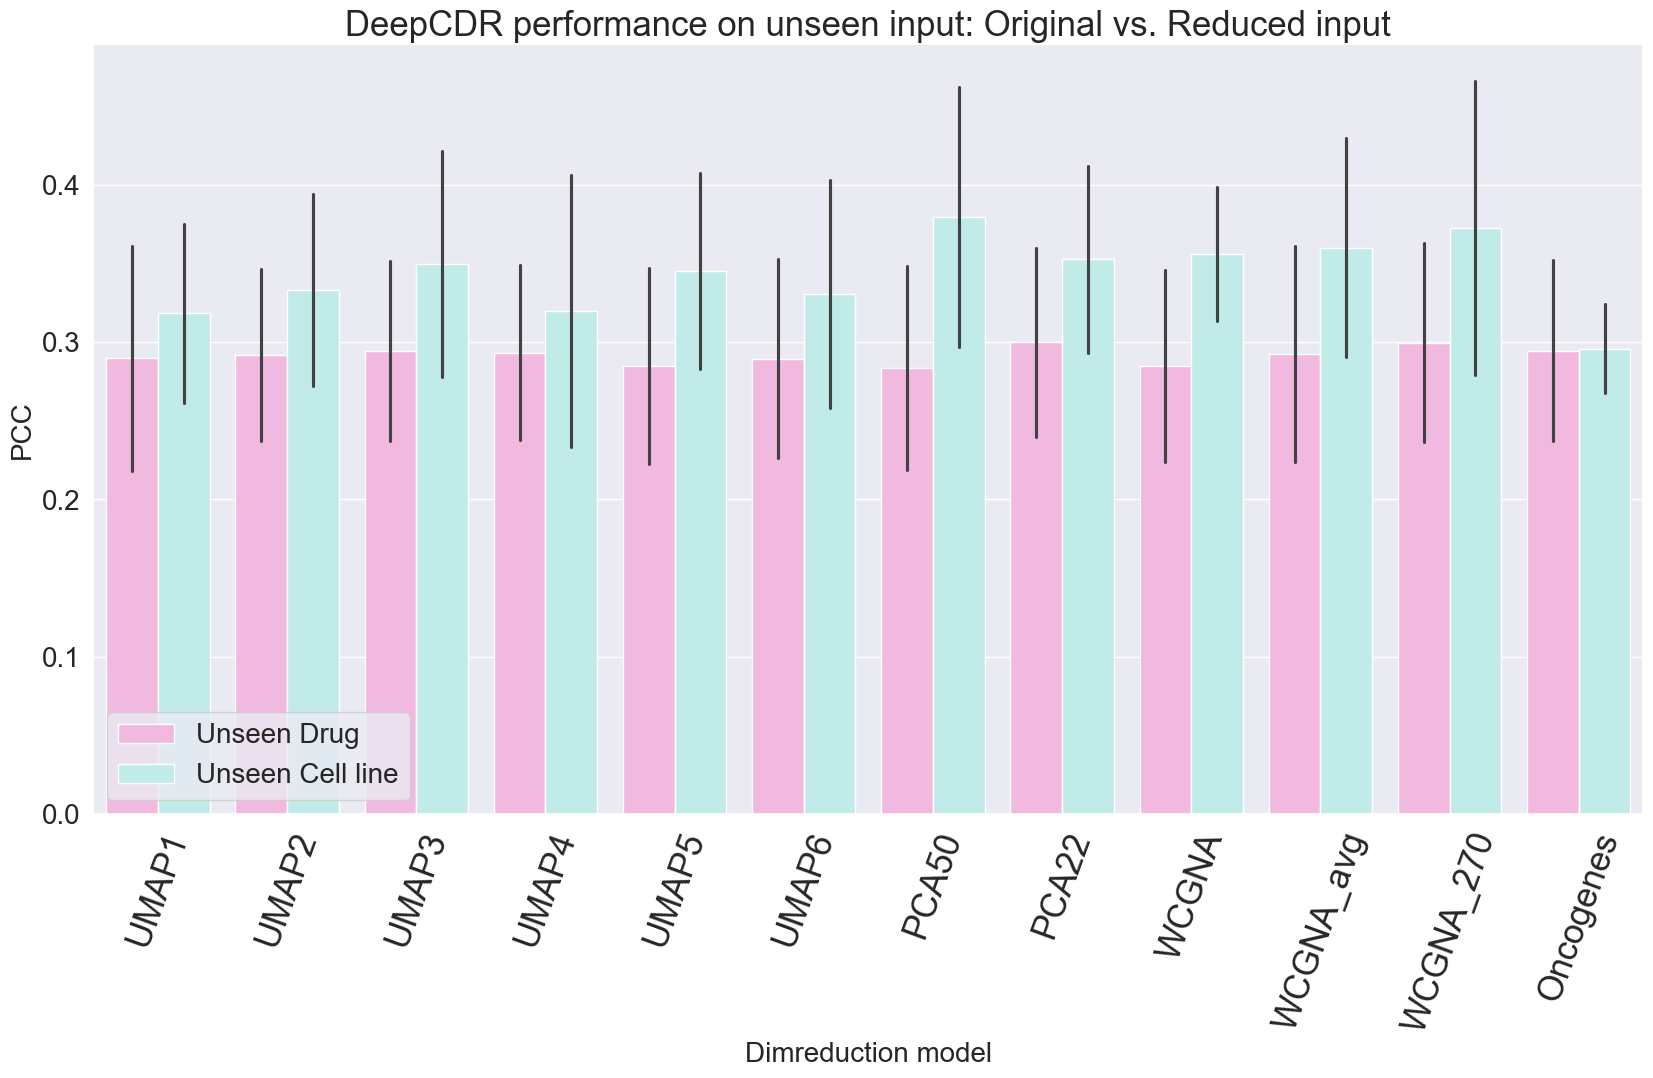

In [120]:
sb.barplot(data=r,x="Model",y="PCC",hue="Parameters",hue_order=["Unseen Drug","Unseen Cell line"],errorbar="sd",palette=palette)
plt.xticks(rotation=70,size=25)
plt.yticks(size=20)
plt.ylabel("PCC",size=20)
plt.xlabel("Dimreduction model",size=20)
plt.title("DeepCDR performance on unseen input: Original vs. Reduced input",size=25)
plt.legend(loc = 'lower left',bbox_to_anchor=(0,0),fontsize=20)

#sb.lineplot(data=get_combined(r,"LDO"), x= "",y="PCC",errorbar="sd",color=sb.color_palette("dark")[0],label="Default: Oncogenes")
#sb.lineplot(data=get_combined(r,"LCO"), x= "",y="PCC",errorbar="sd",color=sb.color_palette("dark")[1],label="LCO: Oncogenes")
plt.xlim(-0.5,len(r.Model.unique())-0.5)
#plt.legend( )

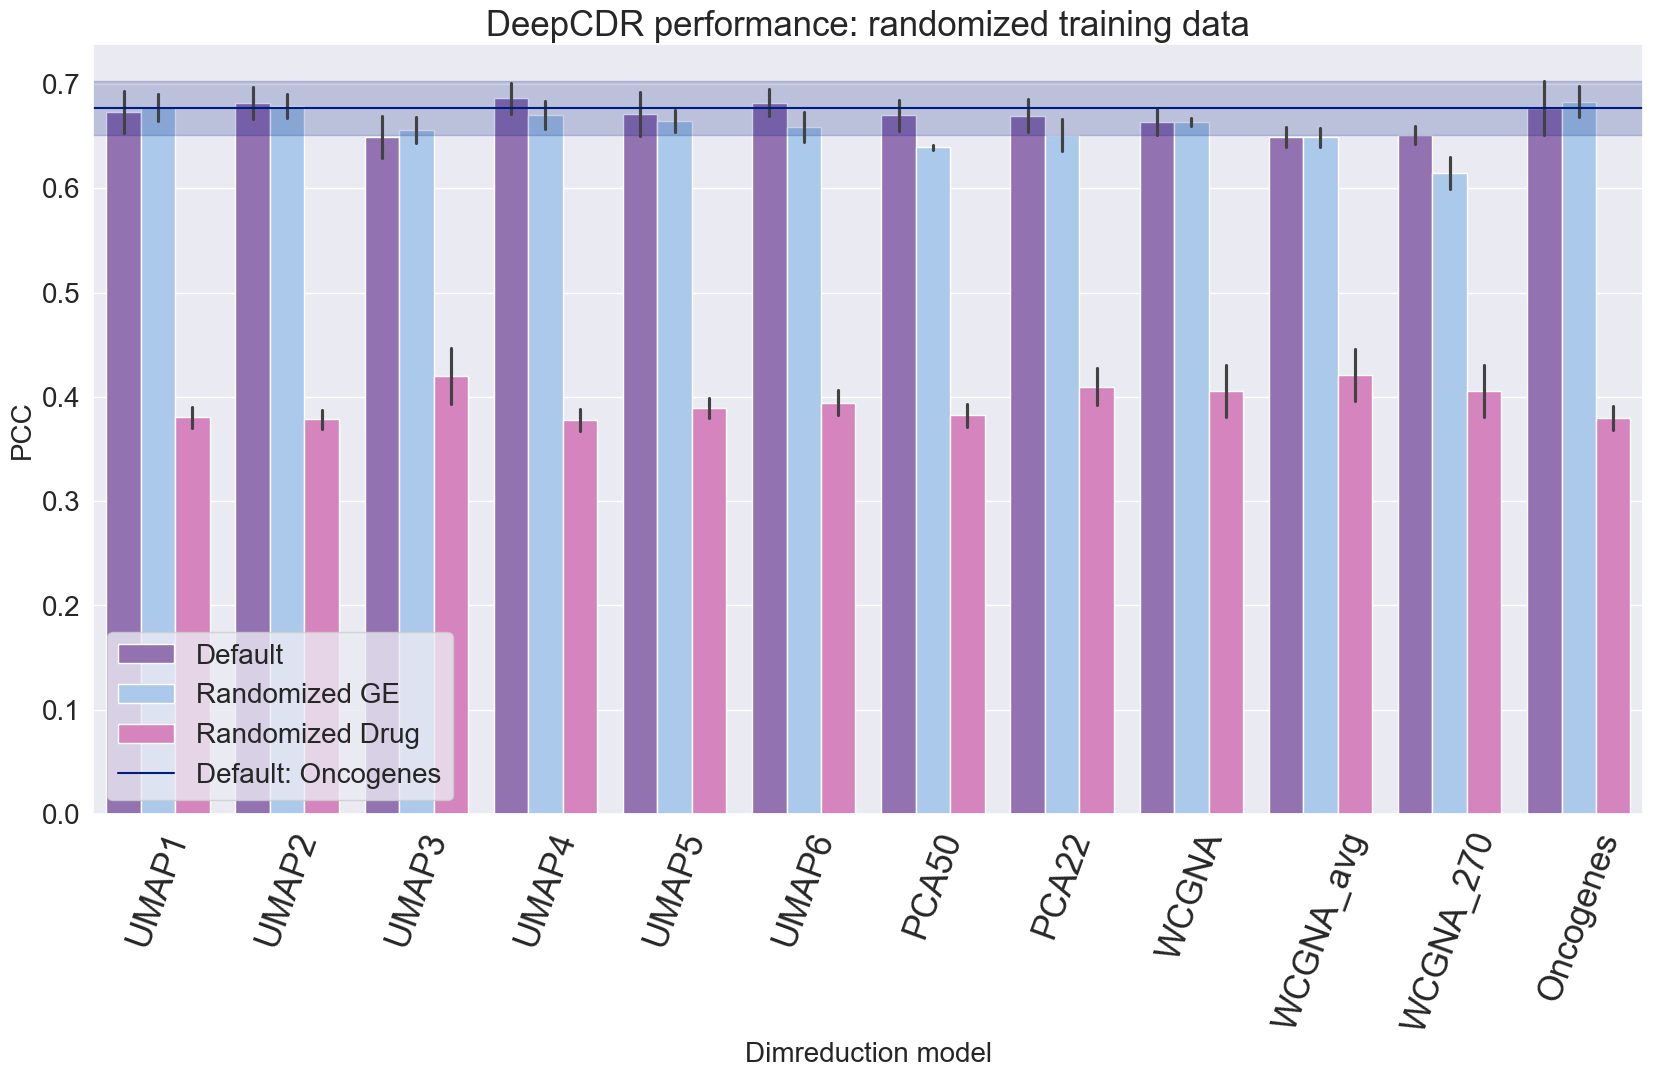

In [121]:
sb.barplot(data=r,x="Model",y="PCC",hue="Parameters",hue_order=["Default","Randomized GE","Randomized Drug"], palette=palette,errorbar="sd")
plt.xticks(rotation=70,size=25)
plt.yticks(size=20)
plt.ylabel("PCC",size=20)
plt.xlabel("Dimreduction model",size=20)
plt.title("DeepCDR performance: randomized training data",size=25)

sb.lineplot(data=get_combined(r,"Default"), x= "",y="PCC",errorbar="sd",color=sb.color_palette("dark")[0],label="Default: Oncogenes")
#sb.lineplot(data=get_combined(r,"Randomized GE"), x= "",y="PCC",errorbar="sd",color=sb.color_palette("dark")[4],label="Randomized GE: Oncogenes")
#sb.lineplot(data=get_combined(r,"Randomized Drug"), x= "",y="PCC",errorbar="sd",color=sb.color_palette("dark")[5],label="Randomized Drugs: Oncogenes")
plt.xlim(-0.5,len(r.Model.unique())-0.5)
plt.legend( loc = 'lower left',bbox_to_anchor=(0,0),fontsize=20)

## Effect of adding back mean

In [4]:
results2 = pd.read_csv("Mean_added.csv")

In [7]:
results2 

,Model,Parameter,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0,UMAP 1,Mean subtracted,0.6979,0.6760,0.6777,0.6724,0.6635
1,UMAP 2,Mean subtracted,0.6763,0.6935,0.6809,0.6810,0.6617
2,UMAP 3,Mean subtracted,0.6567,0.6561,0.6734,0.6533,0.6386
3,UMAP 4,Mean subtracted,0.6745,0.6756,0.6764,0.6457,0.6789
4,UMAP 5,Mean subtracted,0.6783,0.6728,0.6582,0.6595,0.6534
5,UMAP 6,Mean subtracted,0.6447,0.6533,0.6800,0.6483,0.6660
6,PCA 50,Mean subtracted,0.6369,0.6419,0.6411,0.6397,0.6363
7,PCA 22,Mean subtracted,0.6276,0.6622,0.6469,0.6509,0.6676
8,WGCNA 22,Mean subtracted,0.6637,0.6598,0.6698,0.6632,0.6619
9,WGCNA_avg,Mean subtracted,0.6415,0.6495,0.6593,0.6378,0.6550


In [8]:
#bring into right format for barplot
r2 = results2.melt(id_vars=["Model","Parameter"],var_name="Fold", 
        value_name="PCC")

In [18]:
#set figuresize
sb.set(rc={'figure.figsize':(16,7)})

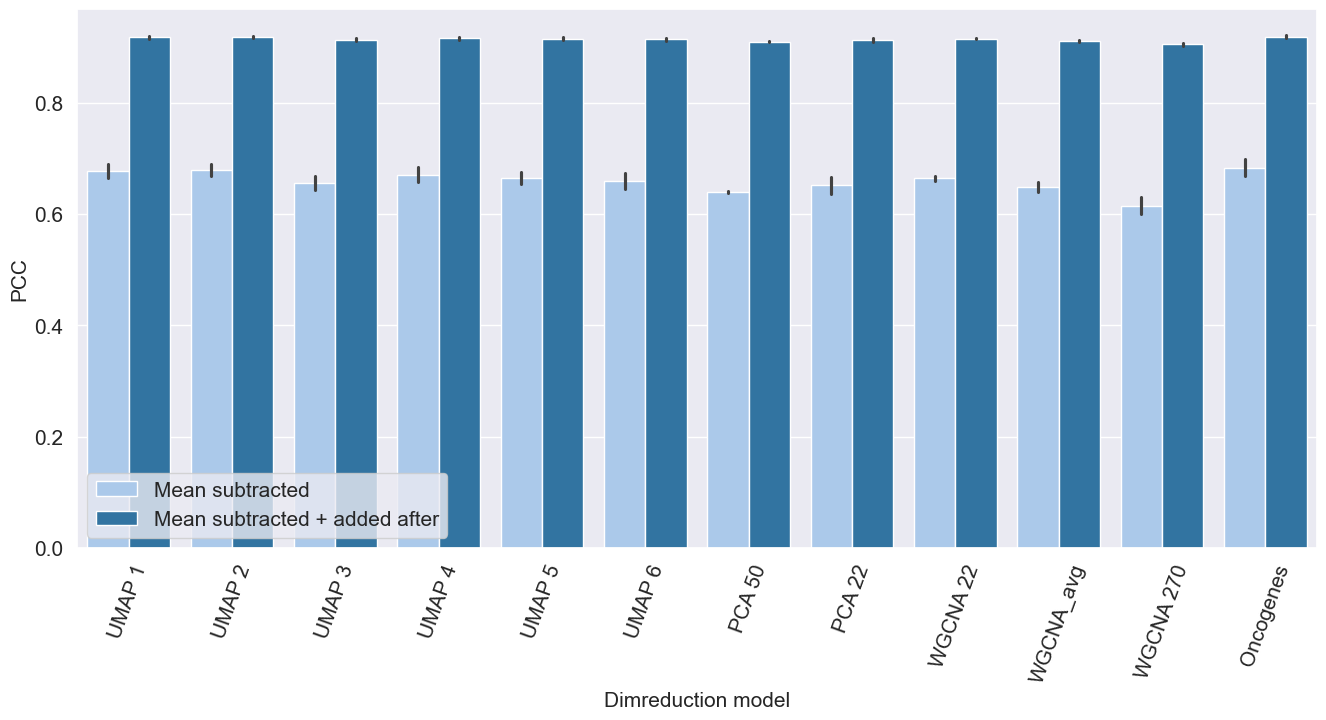

In [28]:
sb.barplot(data=r2,x="Model",y="PCC",hue="Parameter",errorbar="sd",
           palette={"Mean subtracted":sb.color_palette("pastel")[0],"Mean subtracted + added after":sb.color_palette("tab10")[0]})
plt.xticks(rotation=70,size=15)
plt.yticks(size=15)
plt.ylabel("PCC",size=15)
plt.xlabel("Dimreduction model",size=15)
#plt.title("DeepCDR performance: randomized training data",size=25)
plt.legend( loc = 'lower left',bbox_to_anchor=(0,0),fontsize=15)